In [4]:
# Importing liberies that required

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
#Reading the given data
df=pd.read_csv("youtubers_df.csv")
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,MÃºsica y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,EducaciÃ³n,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000,Estados Unidos,397400.0,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000,India,1100000.0,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,MÃºsica y baile,11700000,Unknown,211400.0,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000,India,14000.0,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


## Data exploration:

   - Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers..

In [6]:
# Information of the  data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   int64  
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   int64  
 7   Comments    1000 non-null   int64  
 8   Links       1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [7]:
#summary stastistic 
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [8]:
# Missing values of data
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [9]:
#306 rows are missing in "Categories" column.
(306/1000)*100

30.599999999999998

- 30% of data is missing in Categories column. we need to drop the null data in catagories column


In [15]:
# Dropping the null values.
df.dropna(inplace=True)
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,MÃºsica y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,EducaciÃ³n,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"PelÃ­culas, Videojuegos",111500000,Estados Unidos,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000,Estados Unidos,359000.0,8800,342,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...
990,991,JoeHattab,PelÃ­culas,11700000,Somalia,1900000.0,98500,2900,http://youtube.com/channel/UCe6eisvsctSPvBhmin...
991,992,BeAmazed,EducaciÃ³n,11700000,Estados Unidos,477800.0,9900,556,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...
997,998,LittleAngelIndonesia,MÃºsica y baile,11700000,Unknown,211400.0,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...


In [16]:
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [17]:
#duplicates
df.duplicated().sum()

0

In [81]:
Top_subs = df.sort_values(by ="Suscribers", ascending= False).head(10)
Top_subs

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,HighPerformance,Engagement
0,1,tseries,MÃºsica y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,False,2778
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,True,5318500
2,3,CoComelon,EducaciÃ³n,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,False,24700
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,False,175
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,False,12400
5,6,PewDiePie,"PelÃ­culas, Videojuegos",111500000,Estados Unidos,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,True,202200
6,7,LikeNastyaofficial,Juguetes,107500000,Unknown,2600000.0,28000,0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...,False,28000
7,8,VladandNiki,"AnimaciÃ³n, Juguetes",101400000,Unknown,4100000.0,22100,0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...,False,22100
8,9,zeemusiccompany,MÃºsica y baile,99700000,India,74300.0,2600,32,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...,False,2632
9,10,WWE,Videojuegos,97200000,Estados Unidos,184500.0,6300,214,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...,False,6514


In [24]:
Top_channels_subscribers = df.sort_values(by ="Likes", ascending= False).head(10)
Top_channels_subscribers

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
136,137,MrBeast2,Vlogs diarios,31300000,Estados Unidos,83100000.0,5000000,11600,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...
153,154,DaFuqBoom,"AnimaciÃ³n, Humor",29800000,Estados Unidos,52700000.0,1700000,82800,http://youtube.com/channel/UCsSsgPaZ2GSmO6il8C...
341,342,triggeredinsaan,Humor,20400000,India,11100000.0,1400000,38000,http://youtube.com/channel/UCfLuT3JwLx8rvHjHfT...
488,489,BeastPhilanthropy,Comida y bebida,16900000,Estados Unidos,21500000.0,952100,24000,http://youtube.com/channel/UCAiLfjNXkNv24uhpzU...
238,239,alanbecker,"AnimaciÃ³n, Videojuegos",24300000,Estados Unidos,7600000.0,582600,5900,http://youtube.com/channel/UCbKWv2x9t6u8yZoB3K...
306,307,khangsresearchcentre1685,EducaciÃ³n,21700000,India,7300000.0,501700,17000,http://youtube.com/channel/UCatL-c6pmnjzEOHSyj...
590,591,GoAmiGo,Vlogs diarios,15400000,Colombia,7900000.0,455300,2300,http://youtube.com/channel/UCp4Fk7Xy_wYq8sFKcK...
366,367,Vsauce,Ciencia y tecnologÃ­a,19900000,Estados Unidos,4500000.0,449000,3600,http://youtube.com/channel/UC6nSFpj9HTCZ5t-N3R...
131,132,fedevigevani,"AnimaciÃ³n, Humor",32000000,MÃ©xico,7700000.0,412200,17000,http://youtube.com/channel/UCoQm-PeHC-cbJclKJY...


In [83]:
Top_subs = df.sort_values(by ="Visits", ascending= False).head(10)
Top_subs

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,HighPerformance,Engagement
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,True,5318500
136,137,MrBeast2,Vlogs diarios,31300000,Estados Unidos,83100000.0,5000000,11600,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...,True,5011600
153,154,DaFuqBoom,"AnimaciÃ³n, Humor",29800000,Estados Unidos,52700000.0,1700000,82800,http://youtube.com/channel/UCsSsgPaZ2GSmO6il8C...,True,1782800
488,489,BeastPhilanthropy,Comida y bebida,16900000,Estados Unidos,21500000.0,952100,24000,http://youtube.com/channel/UCAiLfjNXkNv24uhpzU...,False,976100
288,289,VillageCookingChannel,NaN,22500000,India,21500000.0,321500,5900,http://youtube.com/channel/UCk3JZr7eS3pg5AGEvB...,False,327400
390,391,jaanvipatel,NaN,19100000,India,19100000.0,0,2200,http://youtube.com/channel/UCRqs0TZOqe5nrwP-Br...,False,2200
586,587,_vector_,NaN,15400000,Estados Unidos,15400000.0,712400,1200,http://youtube.com/channel/UCzJ53fi4NuDCYWOk9P...,False,713600
958,959,dojacat,MÃºsica y baile,11900000,Estados Unidos,13600000.0,395300,73000,http://youtube.com/channel/UCzpl23pGTHVYqvKsgY...,False,468300
300,301,alfredolarin,NaN,21900000,El Salvador,12900000.0,707600,2100,http://youtube.com/channel/UCd5ApCORQsMOZZz5E9...,False,709700
805,806,NickPro,Deportes,13200000,Estados Unidos,12200000.0,286000,245,http://youtube.com/channel/UChCBHudFoBnsF0O1fl...,False,286245


In [84]:
Top_subs = df.sort_values(by ="Comments", ascending= False).head(10)
Top_subs

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,HighPerformance,Engagement
436,437,BispoBrunoLeonardo,MÃºsica y baile,18000000,Brasil,762100.0,276400,154000,http://youtube.com/channel/UCVNouUw3d3l5JYVCxh...,False,430400
153,154,DaFuqBoom,"AnimaciÃ³n, Humor",29800000,Estados Unidos,52700000.0,1700000,82800,http://youtube.com/channel/UCsSsgPaZ2GSmO6il8C...,True,1782800
958,959,dojacat,MÃºsica y baile,11900000,Estados Unidos,13600000.0,395300,73000,http://youtube.com/channel/UCzpl23pGTHVYqvKsgY...,False,468300
177,178,DanTDM,"AnimaciÃ³n, Videojuegos",27800000,Estados Unidos,3500000.0,285000,52500,http://youtube.com/channel/UCS5Oz6CHmeoF7vSad0...,True,337500
341,342,triggeredinsaan,Humor,20400000,India,11100000.0,1400000,38000,http://youtube.com/channel/UCfLuT3JwLx8rvHjHfT...,False,1438000
123,124,MRINDIANHACKER,NaN,32600000,India,6500000.0,617400,26000,http://youtube.com/channel/UCSiDGb0MnHFGjs4E2W...,True,643400
488,489,BeastPhilanthropy,Comida y bebida,16900000,Estados Unidos,21500000.0,952100,24000,http://youtube.com/channel/UCAiLfjNXkNv24uhpzU...,False,976100
43,44,A4a4a4a4,"AnimaciÃ³n, Humor",47300000,Rusia,9700000.0,330400,22000,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...,True,352400
132,133,dream,"AnimaciÃ³n, Videojuegos",31900000,Estados Unidos,3300000.0,309200,19000,http://youtube.com/channel/UCTkXRDQl0luXxVQrRQ...,True,328200
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,True,5318500


In [34]:
df1 = df.select_dtypes(include=['number'])
df1

,Rank,Suscribers,Visits,Likes,Comments
0,1,249500000,86200.0,2700,78
1,2,183500000,117400000.0,5300000,18500
2,3,165500000,7000000.0,24700,0
3,4,162600000,15600.0,166,9
4,5,113500000,3900000.0,12400,0
...,...,...,...,...,...
995,996,11700000,397400.0,14000,124
996,997,11700000,1100000.0,92500,164
997,998,11700000,211400.0,745,0
998,999,11700000,14000.0,81,1


In [32]:
df1.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,694.000000,6.940000e+02,6.940000e+02,6.940000e+02,694.000000
mean,495.298271,2.241556e+07,1.210730e+06,5.347360e+04,1558.793948
std,289.222212,1.824123e+07,6.038274e+06,2.979711e+05,7967.470234
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,244.250000,1.380000e+07,3.692500e+04,5.685000e+02,2.000000
50%,492.500000,1.680000e+07,1.587000e+05,3.550000e+03,78.000000
75%,746.750000,2.390000e+07,8.339000e+05,2.377500e+04,499.750000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [33]:
df2=df.select_dtypes(include=['object'])
df2.head()

,Username,Categories,Country,Links
0,tseries,MÃºsica y baile,India,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,MrBeast,"Videojuegos, Humor",Estados Unidos,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,CoComelon,EducaciÃ³n,Unknown,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,KidsDianaShow,"AnimaciÃ³n, Juguetes",Unknown,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,PewDiePie,"PelÃ­culas, Videojuegos",Estados Unidos,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...


In [34]:
df2.describe()

,Username,Categories,Country,Links
count,694,694,694,694
unique,689,45,27,689
top,mgcplayhouse,MÃºsica y baile,Estados Unidos,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
freq,2,160,226,2


In [40]:
#finding the outliers
def find_outliers(data,col) :
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound) ]
    return outliers
    find_outliers(df,"Suscribers")

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,MÃºsica y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,EducaciÃ³n,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"PelÃ­culas, Videojuegos",111500000,Estados Unidos,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000,Unknown,2600000.0,28000,0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"AnimaciÃ³n, Juguetes",101400000,Unknown,4100000.0,22100,0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,MÃºsica y baile,99700000,India,74300.0,2600,32,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000,Estados Unidos,184500.0,6300,214,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...
10,11,BLACKPINK,MÃºsica y baile,91300000,Estados Unidos,863200.0,146900,3400,http://youtube.com/channel/UCOmHUn--16B90oW2L6...


In [42]:
find_outliers(df,"Suscribers").nunique()

Rank          60
Username      60
Categories    16
Suscribers    52
Country        9
Visits        56
Likes         54
Comments      37
Links         60
dtype: int64

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

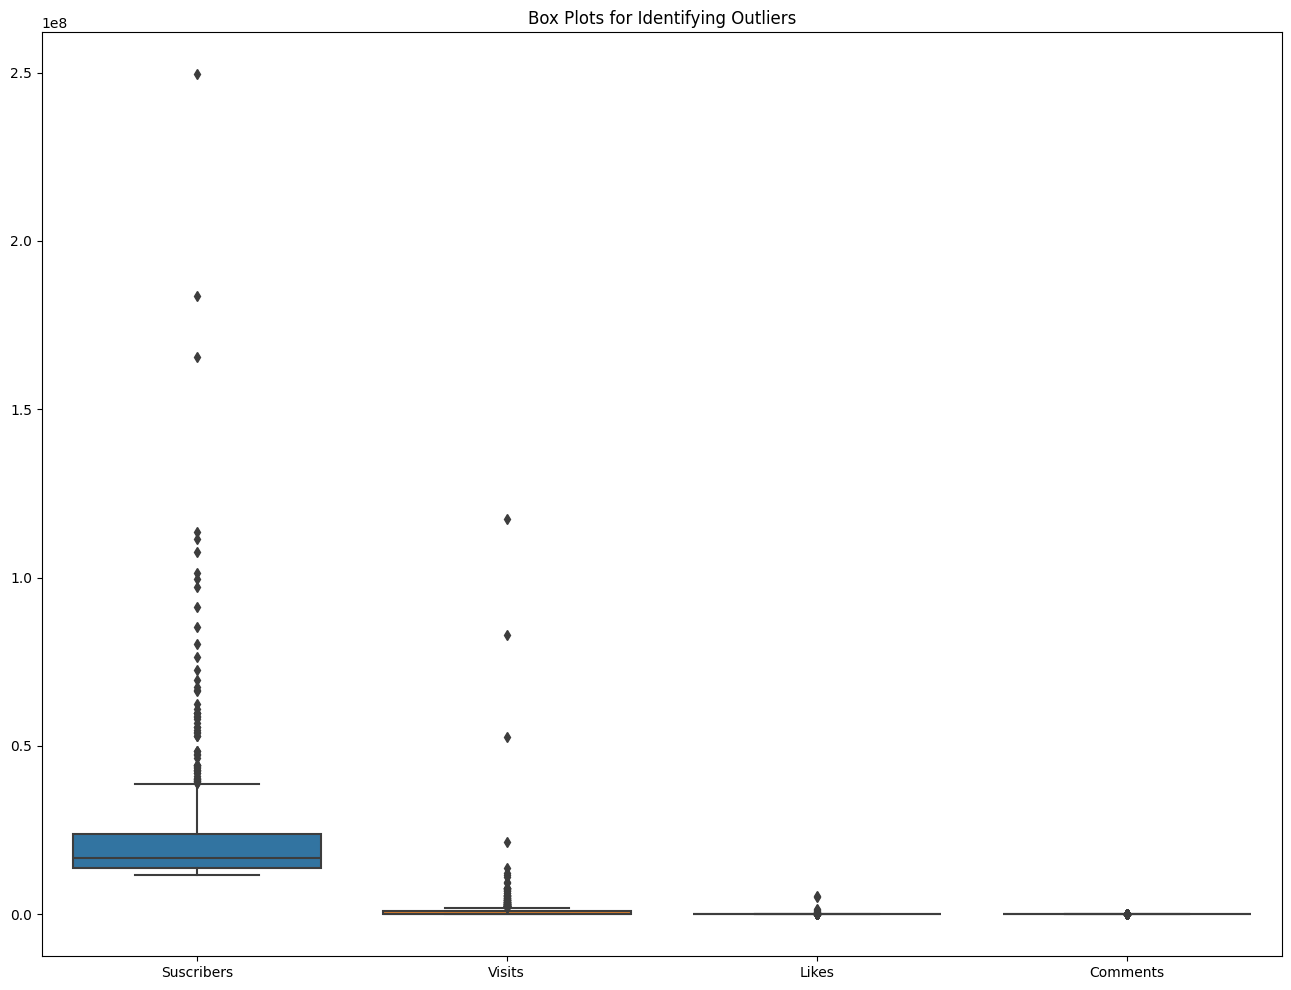

In [48]:
# Box plots To Identify Outliers
plt.figure(figsize=(16,12))
sns.boxplot(data=df[['Suscribers', 'Visits', 'Likes', 'Comments']])
plt.title('Box Plots for Identifying Outliers')
plt.show()

## Trend Analysis:    
Identify trends among the top YouTube streamers. Which categories are the most popular
    ?    
Is there a correlation between the number of subscribers and the number of likes or comments?

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


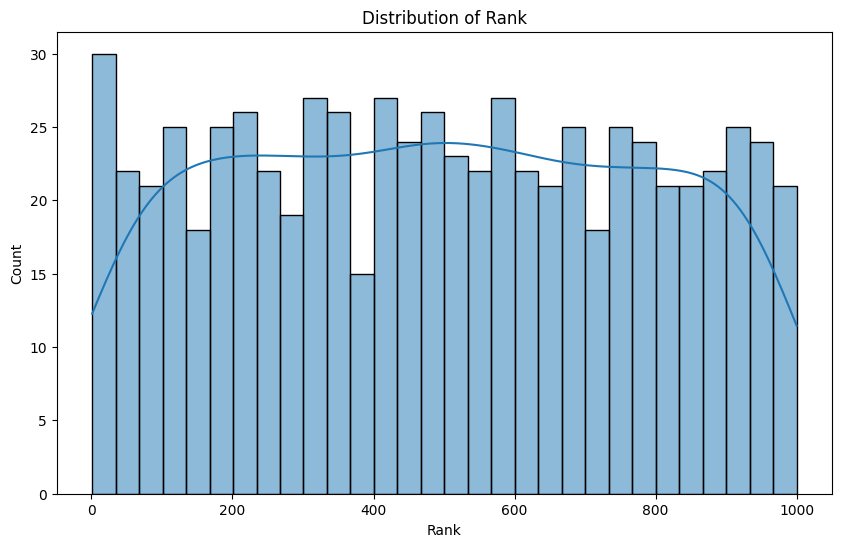

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


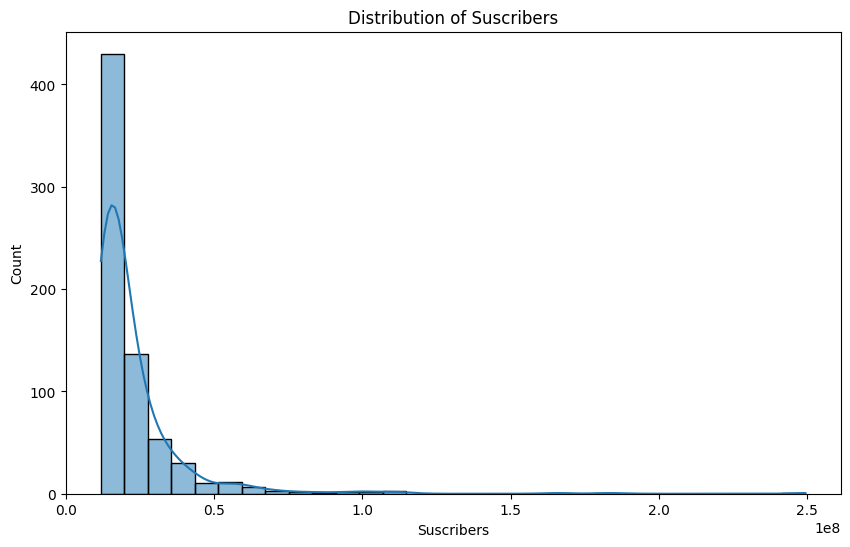

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


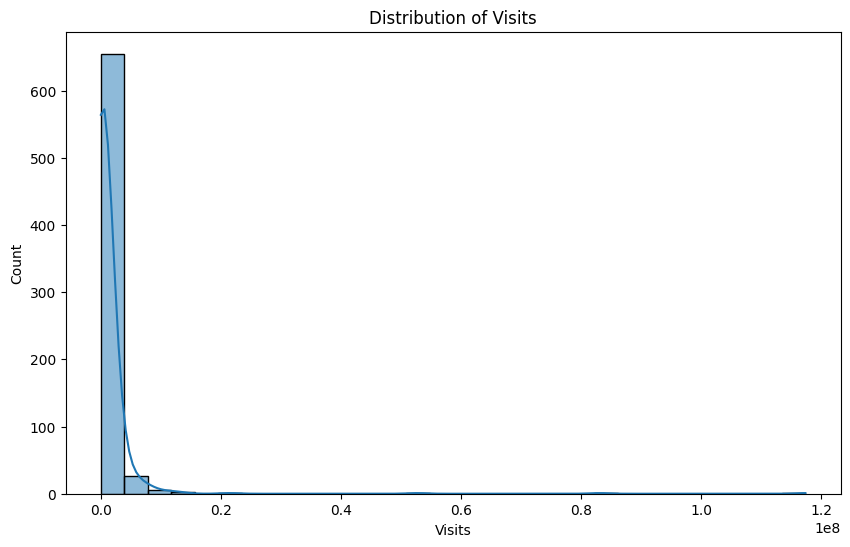

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


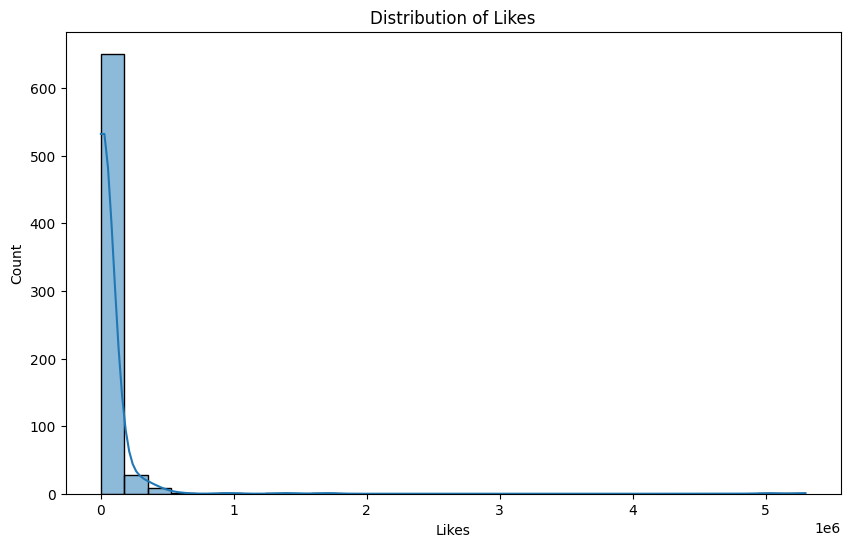

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


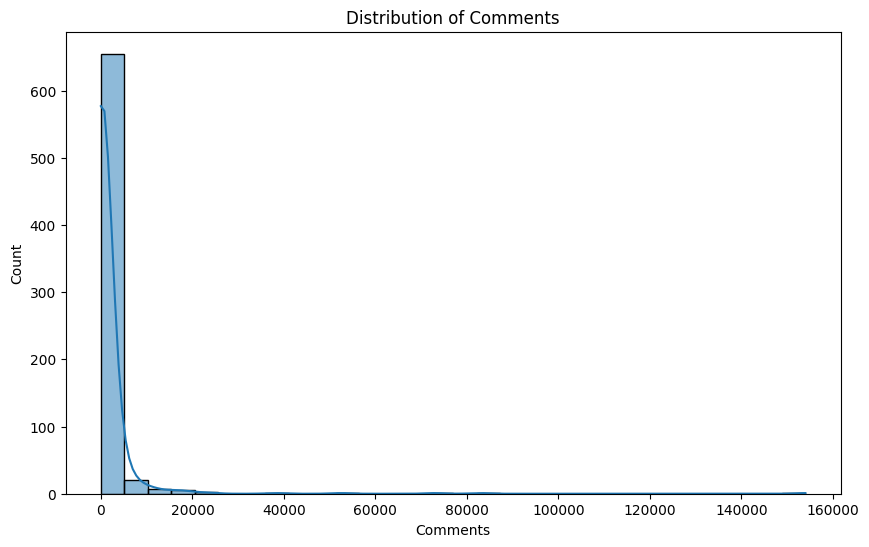

In [53]:
# PDFs and Histograms for Numerical Columns
for  col in df1 :
    plt.figure(figsize=(10, 6))
    sns.histplot(df_n[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


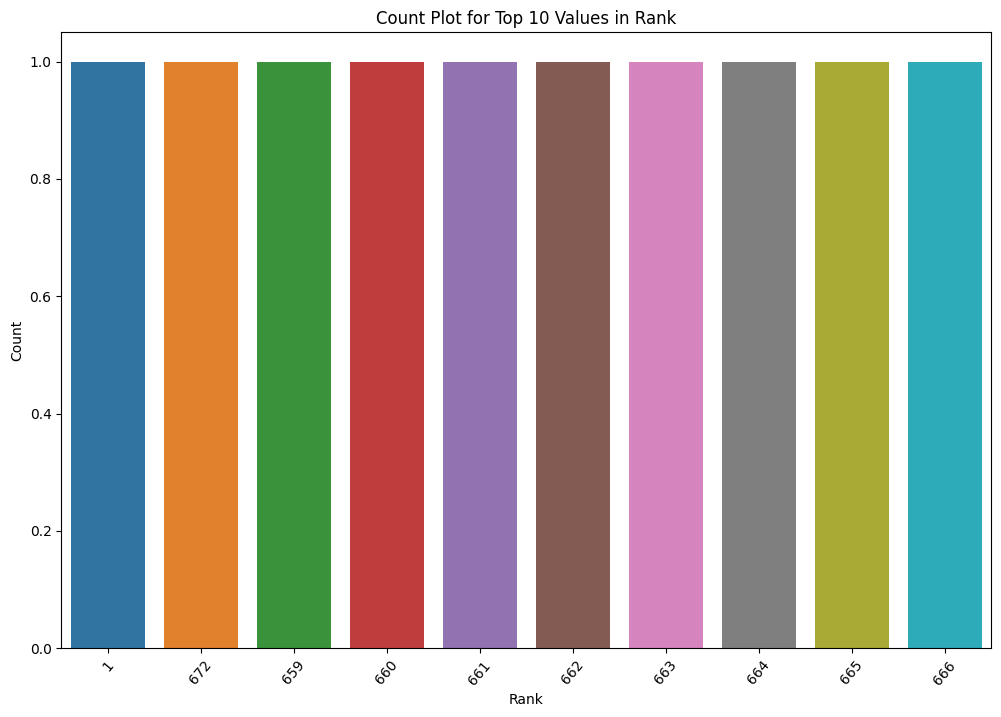

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


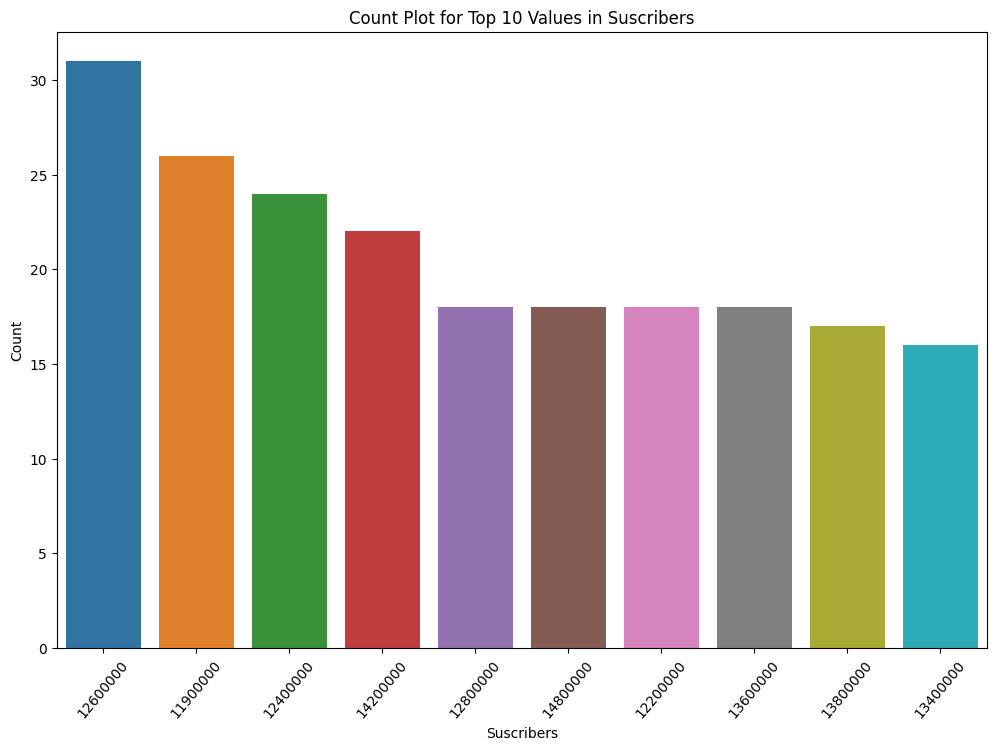

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


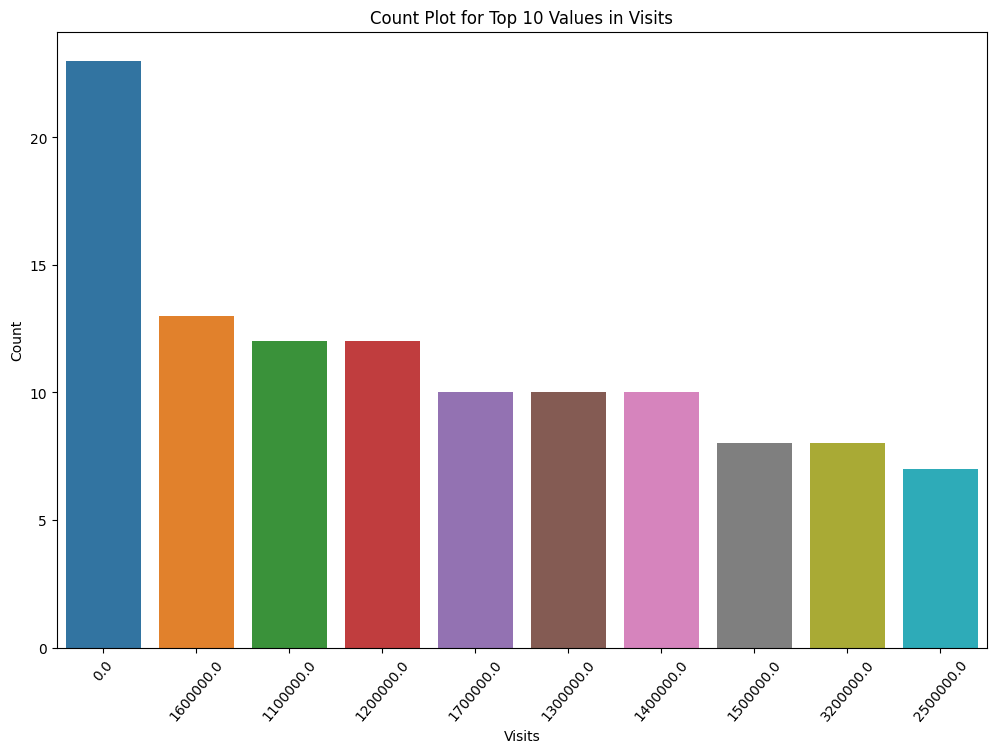

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


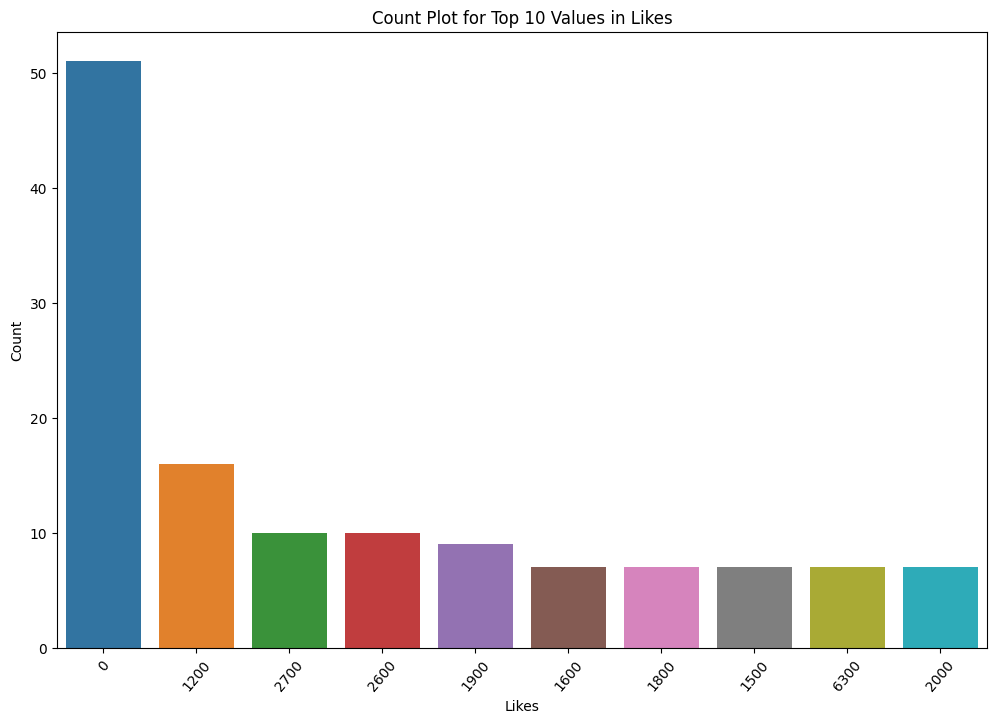

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


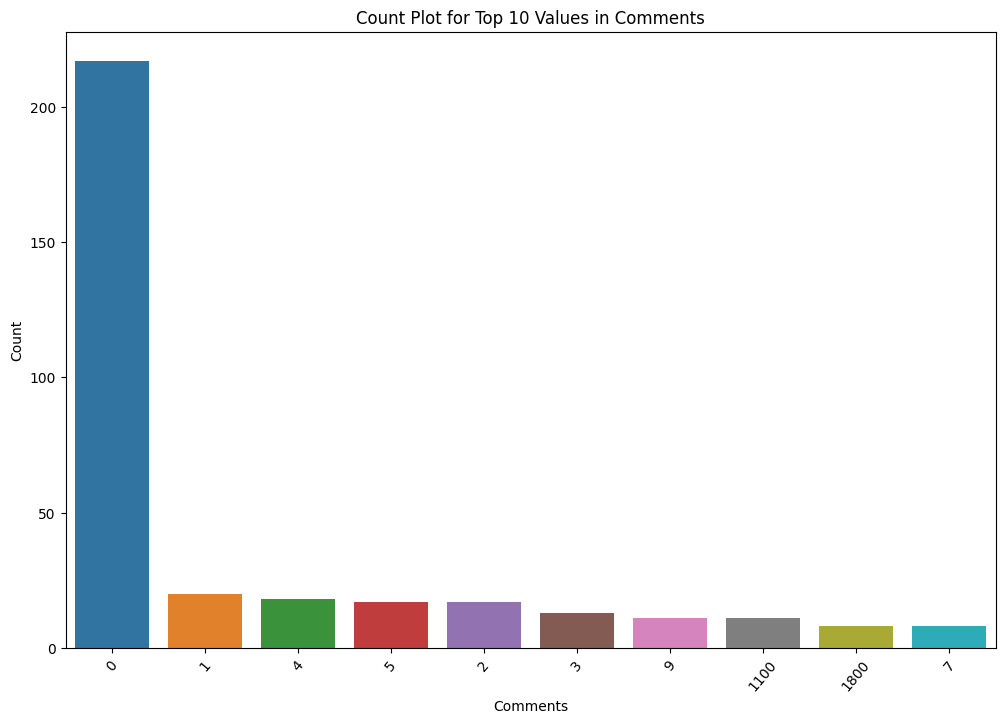

In [36]:
# Create Count Plots For The Top 10 Values In Each Categorical Column

for col in df1:
    # Get the top 10 values and their counts
    top_values = df1[col].value_counts().head(10)
    # Create a count plot for the top 10 values
    plt.figure(figsize=(12, 8))
    sns.countplot(x=col, data=df, order=top_values.index)
    
    plt.title(f'Count Plot for Top 10 Values in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=50)
    plt.show()

## Trend analyasis

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


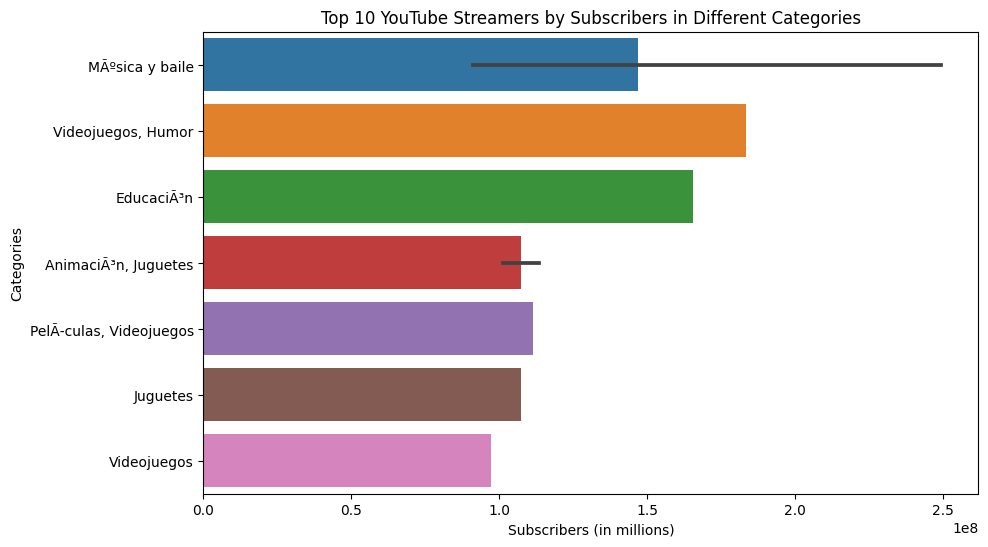

In [60]:
# Trend Analysis Of Popular Categories 
plt.figure(figsize=(10, 6))
sns.barplot(x='Suscribers', y='Categories', data=df.sort_values(by='Suscribers', ascending=False).head(10))
plt.title('Top 10 YouTube Streamers by Subscribers in Different Categories')
plt.xlabel('Subscribers (in millions)')
plt.ylabel('Categories')
plt.show()

In [7]:
# Correlation Analysis
correlation_matrix = df[['Suscribers', 'Likes', 'Comments']].corr()

In [8]:
correlation_matrix

,Suscribers,Likes,Comments
Suscribers,1.000000,0.211639,0.036350
Likes,0.211639,1.000000,0.325911
Comments,0.036350,0.325911,1.000000


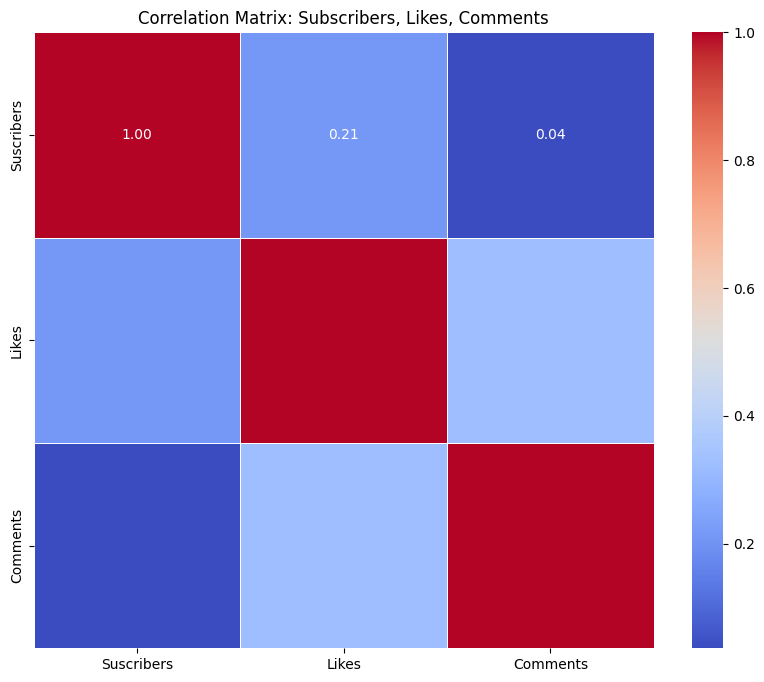

In [18]:
# Heatmap For Correlation Matrix Of Subs. , Likes & Comments
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.4)
plt.title('Correlation Matrix: Subscribers, Likes, Comments')
plt.show()

## Audience Study:
Analyze the distribution of streamers'audiences by country. Are there regional preferences for specific content categories?

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


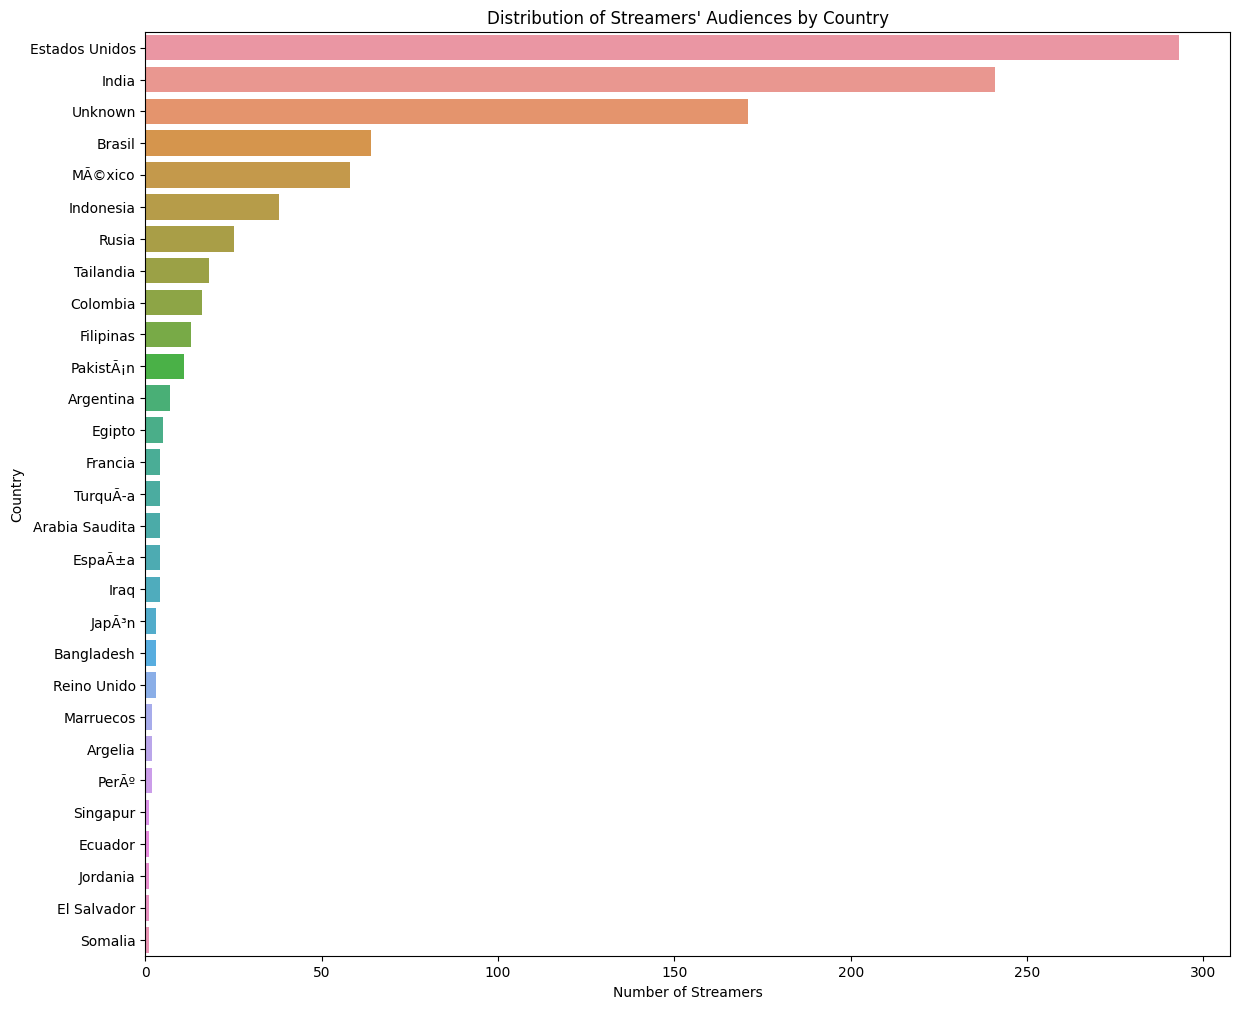

In [20]:
# Bar chart for distribution of streamers audiences by country
plt.figure(figsize=(14, 12))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Distribution of Streamers\' Audiences by Country')
plt.xlabel('Number of Streamers')
plt.ylabel('Country')
plt.show()

In [21]:
# Heatmap to visualize regional preferences for specific content categories

heatmap_data = df.pivot_table(index='Country', columns='Categories', aggfunc='size', fill_value=0)

In [22]:
heatmap_data

Categories,ASMR,"ASMR, Comida y bebida",AnimaciÃ³n,"AnimaciÃ³n, Humor","AnimaciÃ³n, Humor, Juguetes","AnimaciÃ³n, Juguetes","AnimaciÃ³n, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnologÃ­a,...,PelÃ­culas,"PelÃ­culas, AnimaciÃ³n","PelÃ­culas, Humor","PelÃ­culas, Juguetes","PelÃ­culas, Videojuegos","Viajes, EspectÃ¡culos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Country,,,,,,,,,,,,,,,,,,,,,
Arabia Saudita,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argelia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,1,0,0,0,0,0,0,0,...,1,2,1,0,0,0,0,0,0,0
Bangladesh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Brasil,0,0,3,2,0,0,2,0,0,2,...,2,12,4,0,1,0,0,0,0,2
Colombia,0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Egipto,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
EspaÃ±a,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
Estados Unidos,1,1,4,17,0,1,19,2,1,8,...,6,10,9,0,2,0,9,14,0,7


In [1]:
# Plot Heatmap Of Regional Performance For Content Catagories by Country
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='YlOrBr', annot=False, fmt='d', linewidths=.5)
plt.title('Regional Preferences for Content Categories by Country')
plt.xlabel('Categories')
plt.ylabel('Country')
plt.show()

NameError: name 'plt' is not defined

### Performance Metrics:
Calculate and visualize the average number of subscribers, visits, likes, and comments.
Are there patterns or anomalies in these metrics?

In [32]:
# Calculate the average metrics
average_metrics = df[['Suscribers','Visits', 'Likes','Comments']].mean()
average_metrics

Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64

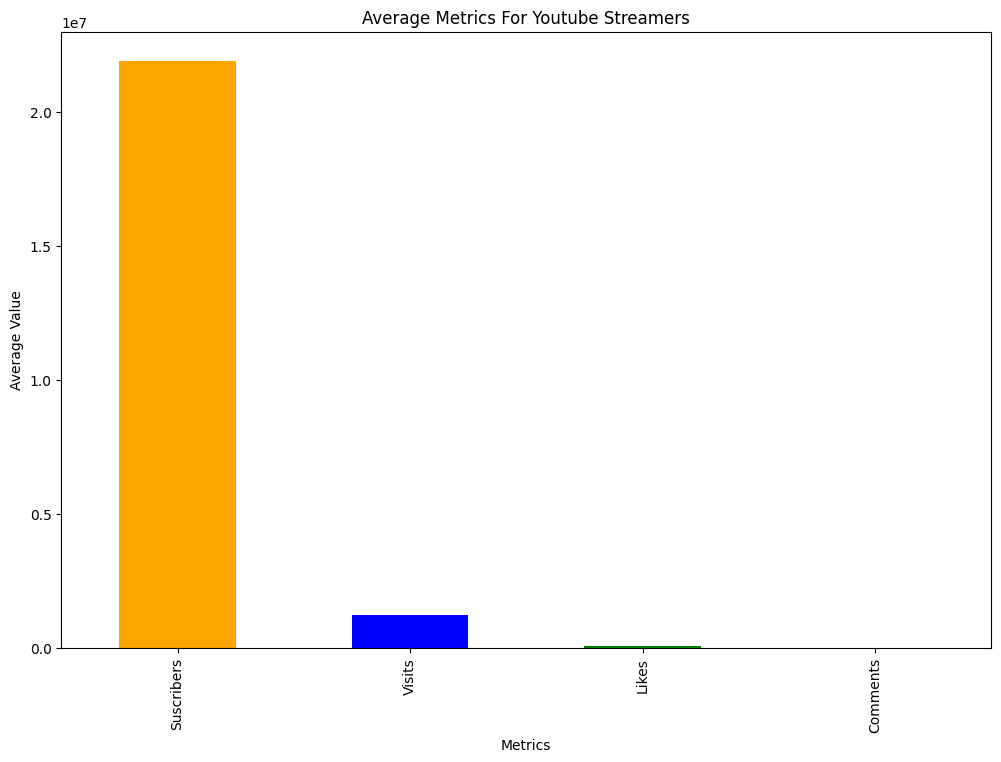

In [39]:
# Visualize the average metrics
plt.figure(figsize=(12, 8))
average_metrics.plot(kind='bar', color=['orange','blue', 'green', 'red'])
plt.title('Average Metrics For Youtube Streamers')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()

## Content Categories:
Explore the distribution of content categories. Which categories have the highest number of streamers?
Are there specific categories with exceptional performance metrics?

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


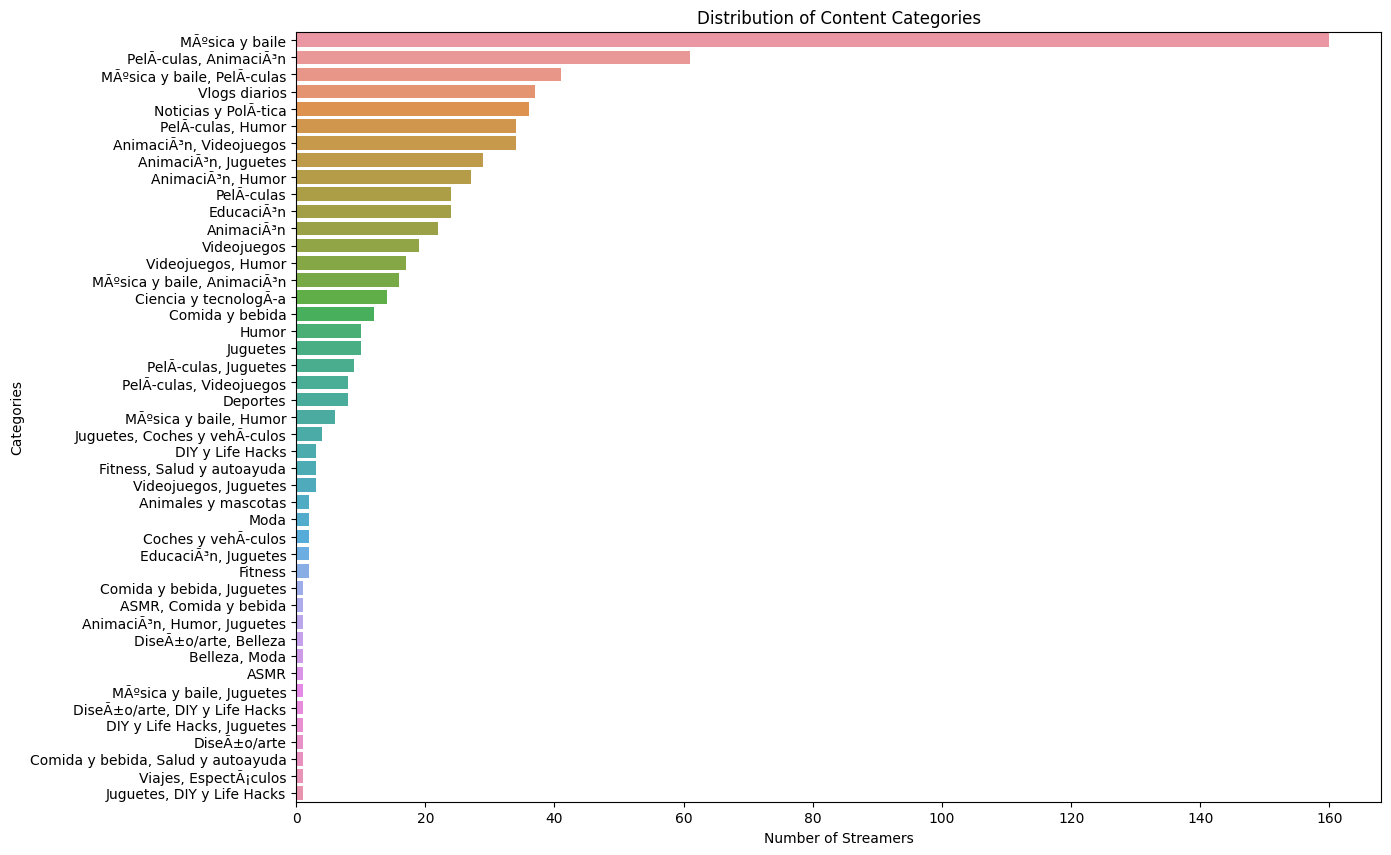

In [40]:
# Bar chart for distribution of content categories
plt.figure(figsize=(14, 10))
sns.countplot(y='Categories', data=df, order=df['Categories'].value_counts().index)
plt.title('Distribution of Content Categories')
plt.xlabel('Number of Streamers')
plt.ylabel('Categories')
plt.show()

In [41]:
# Calculate average performance metrics for each content category
average_metrics_by_category = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
average_metrics_by_category

,Suscribers,Visits,Likes,Comments
Categories,,,,
ASMR,1.520000e+07,3.685000e+05,4100.000000,148.000000
"ASMR, Comida y bebida",1.300000e+07,5.575000e+05,8600.000000,349.000000
AnimaciÃ³n,1.764091e+07,6.367182e+05,21413.454545,396.636364
"AnimaciÃ³n, Humor",2.078519e+07,3.760126e+06,145768.333333,5344.962963
"AnimaciÃ³n, Humor, Juguetes",1.390000e+07,8.000000e+03,37.000000,0.000000
"AnimaciÃ³n, Juguetes",2.937586e+07,5.254483e+05,2653.068966,0.517241
"AnimaciÃ³n, Videojuegos",1.939412e+07,1.200059e+06,79294.029412,3786.617647
Animales y mascotas,1.560000e+07,2.231450e+06,102750.000000,2806.000000
"Belleza, Moda",2.390000e+07,9.645000e+05,62300.000000,1100.000000


ValueError: bottom cannot be >= top

<Figure size 3000x3000 with 0 Axes>

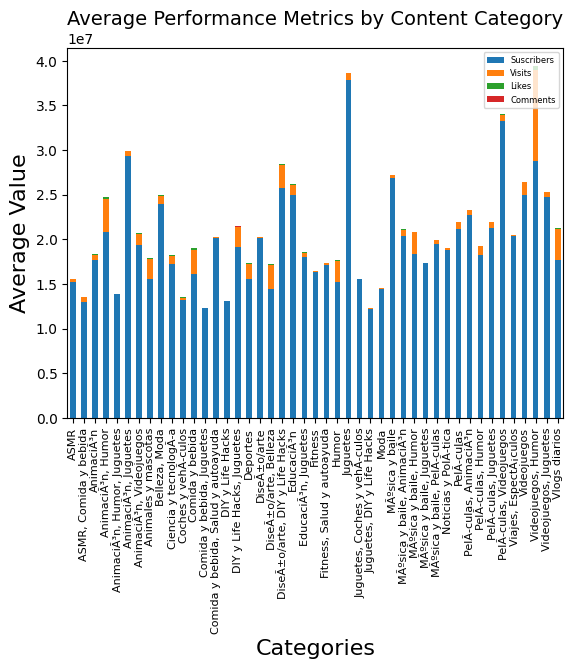

In [59]:
# Visualize average performance metrics for each content category
plt.figure(figsize=(30, 30))

average_metrics_by_category.plot(kind='bar', stacked=True)

plt.title('Average Performance Metrics by Content Category', fontsize=14)
plt.xlabel('Categories', fontsize=16)
plt.ylabel('Average Value', fontsize=16)
plt.legend(loc='upper right', fontsize=6)

# Increase the length of x-axis labels
plt.xticks(rotation=90, ha='center', fontsize=8)  # Rotate labels and adjust horizontal alignment
plt.subplots_adjust(bottom=1)  # Increase the bottom margin to make room for longer labels

plt.show()


## Brands and Collaboration
Analyse wherhter streamers with hign performance matrix receving brand collaboration and marketing campaigns.




In [62]:
# Define High Performance Matrics
# Define High Performance Metrics 
high_subs = df['Suscribers'].quantile(0.75, interpolation="nearest") 
high_likes = df['Likes'].quantile(0.75, interpolation="nearest") 
high_comments = df['Comments'].quantile(0.75, interpolation="nearest")

In [66]:
# Identify High-Performance Streamers 
df['HighPerformance'] = ((df['Suscribers'] >= high_subs) & 
                         (df['Likes'] >= high_likes) & 
                         (df['Comments'] >= high_comments))

In [67]:
# Analyze Engagement with Brands or Marketing Campaigns: 
df['Engagement'] = df['Likes'] + df['Comments'] 
high_performance_engagement = df[df['HighPerformance']]['Engagement'].sum() 
low_performance_engagement = df[~df['HighPerformance']]['Engagement'].sum()

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be

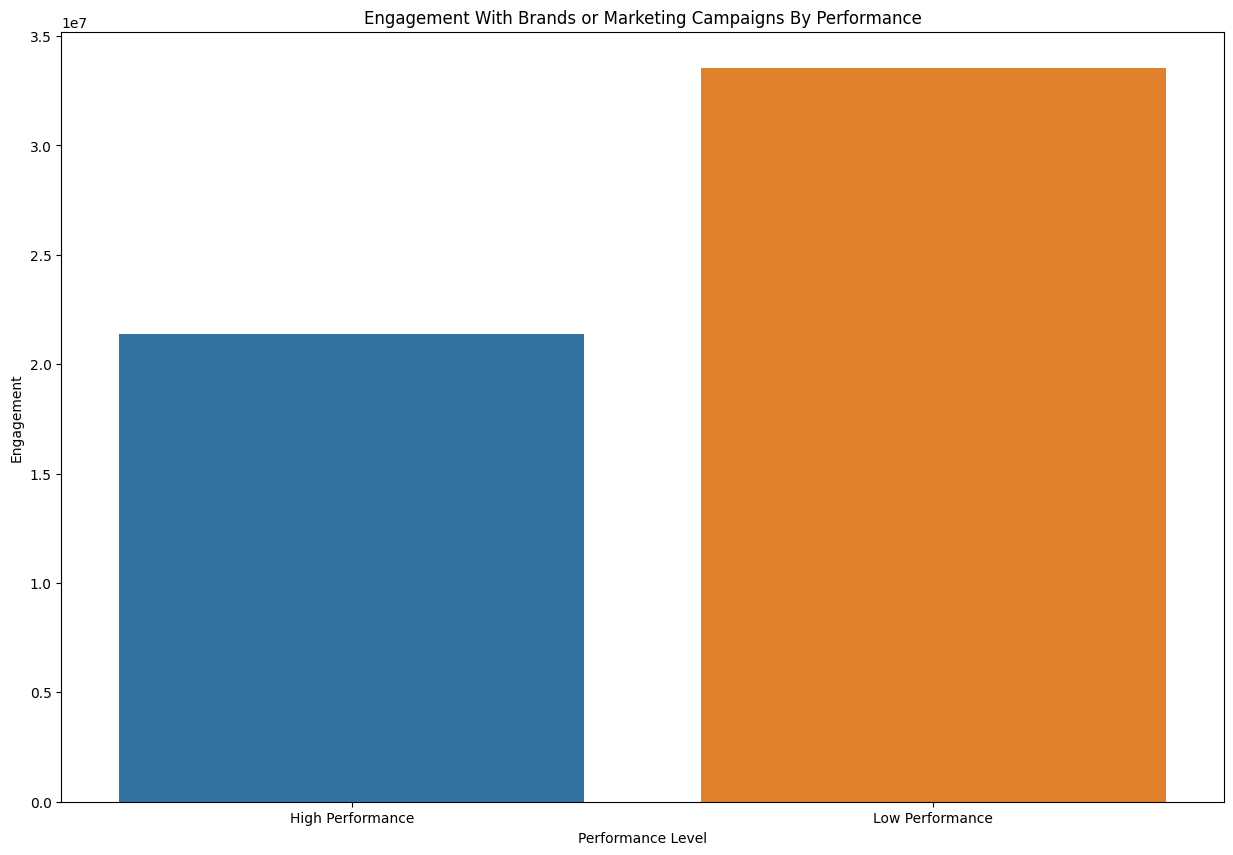

In [73]:
# Visualize the results:
plt.figure(figsize=(15 , 10))
sns.barplot(x=['High Performance', 'Low Performance'], y=[high_performance_engagement, low_performance_engagement])
plt.title('Engagement With Brands or Marketing Campaigns By Performance')
plt.xlabel('Performance Level')
plt.ylabel('Engagement')
plt.show()

In [74]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,HighPerformance,Engagement
0,1,tseries,MÃºsica y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,False,2778
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,True,5318500
2,3,CoComelon,EducaciÃ³n,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,False,24700
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,False,175
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,False,12400


## Benchmarking:
Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
Who are the top-performing content creators?

In [75]:
# Calculate average performance metrics
Average_Metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
Average_Metrics

Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64

In [77]:
# Filter streamers with above-average performance
top_performers = df[
    (df['Suscribers'] > average_metrics['Suscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments']) ]

In [79]:
# Display information about Top performing content creators
Top_performers = top_performers[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']]
print("Top-performing content creators:")
print(Top_performers)

Top-performing content creators:
                  Username  Suscribers       Visits    Likes  Comments
1                  MrBeast   183500000  117400000.0  5300000     18500
5                PewDiePie   111500000    2400000.0   197300      4900
26             dudeperfect    59700000    5300000.0   156500      4200
34             TaylorSwift    54100000    4300000.0   300400     15000
39             JuegaGerman    48600000    2000000.0   117100      3000
43                A4a4a4a4    47300000    9700000.0   330400     22000
58               Mikecrack    43400000    2200000.0   183400      1800
62          KimberlyLoaiza    42100000    5300000.0   271300     16000
64         luisitocomunica    41100000    2500000.0   128900      1800
70             JessNoLimit    39600000    1300000.0    73500      1600
96          TotalGaming093    36300000    1500000.0   129400      4900
98    TechnoGamerzOfficial    35600000    6200000.0   341800     16500
100             markiplier    35500000    21

C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

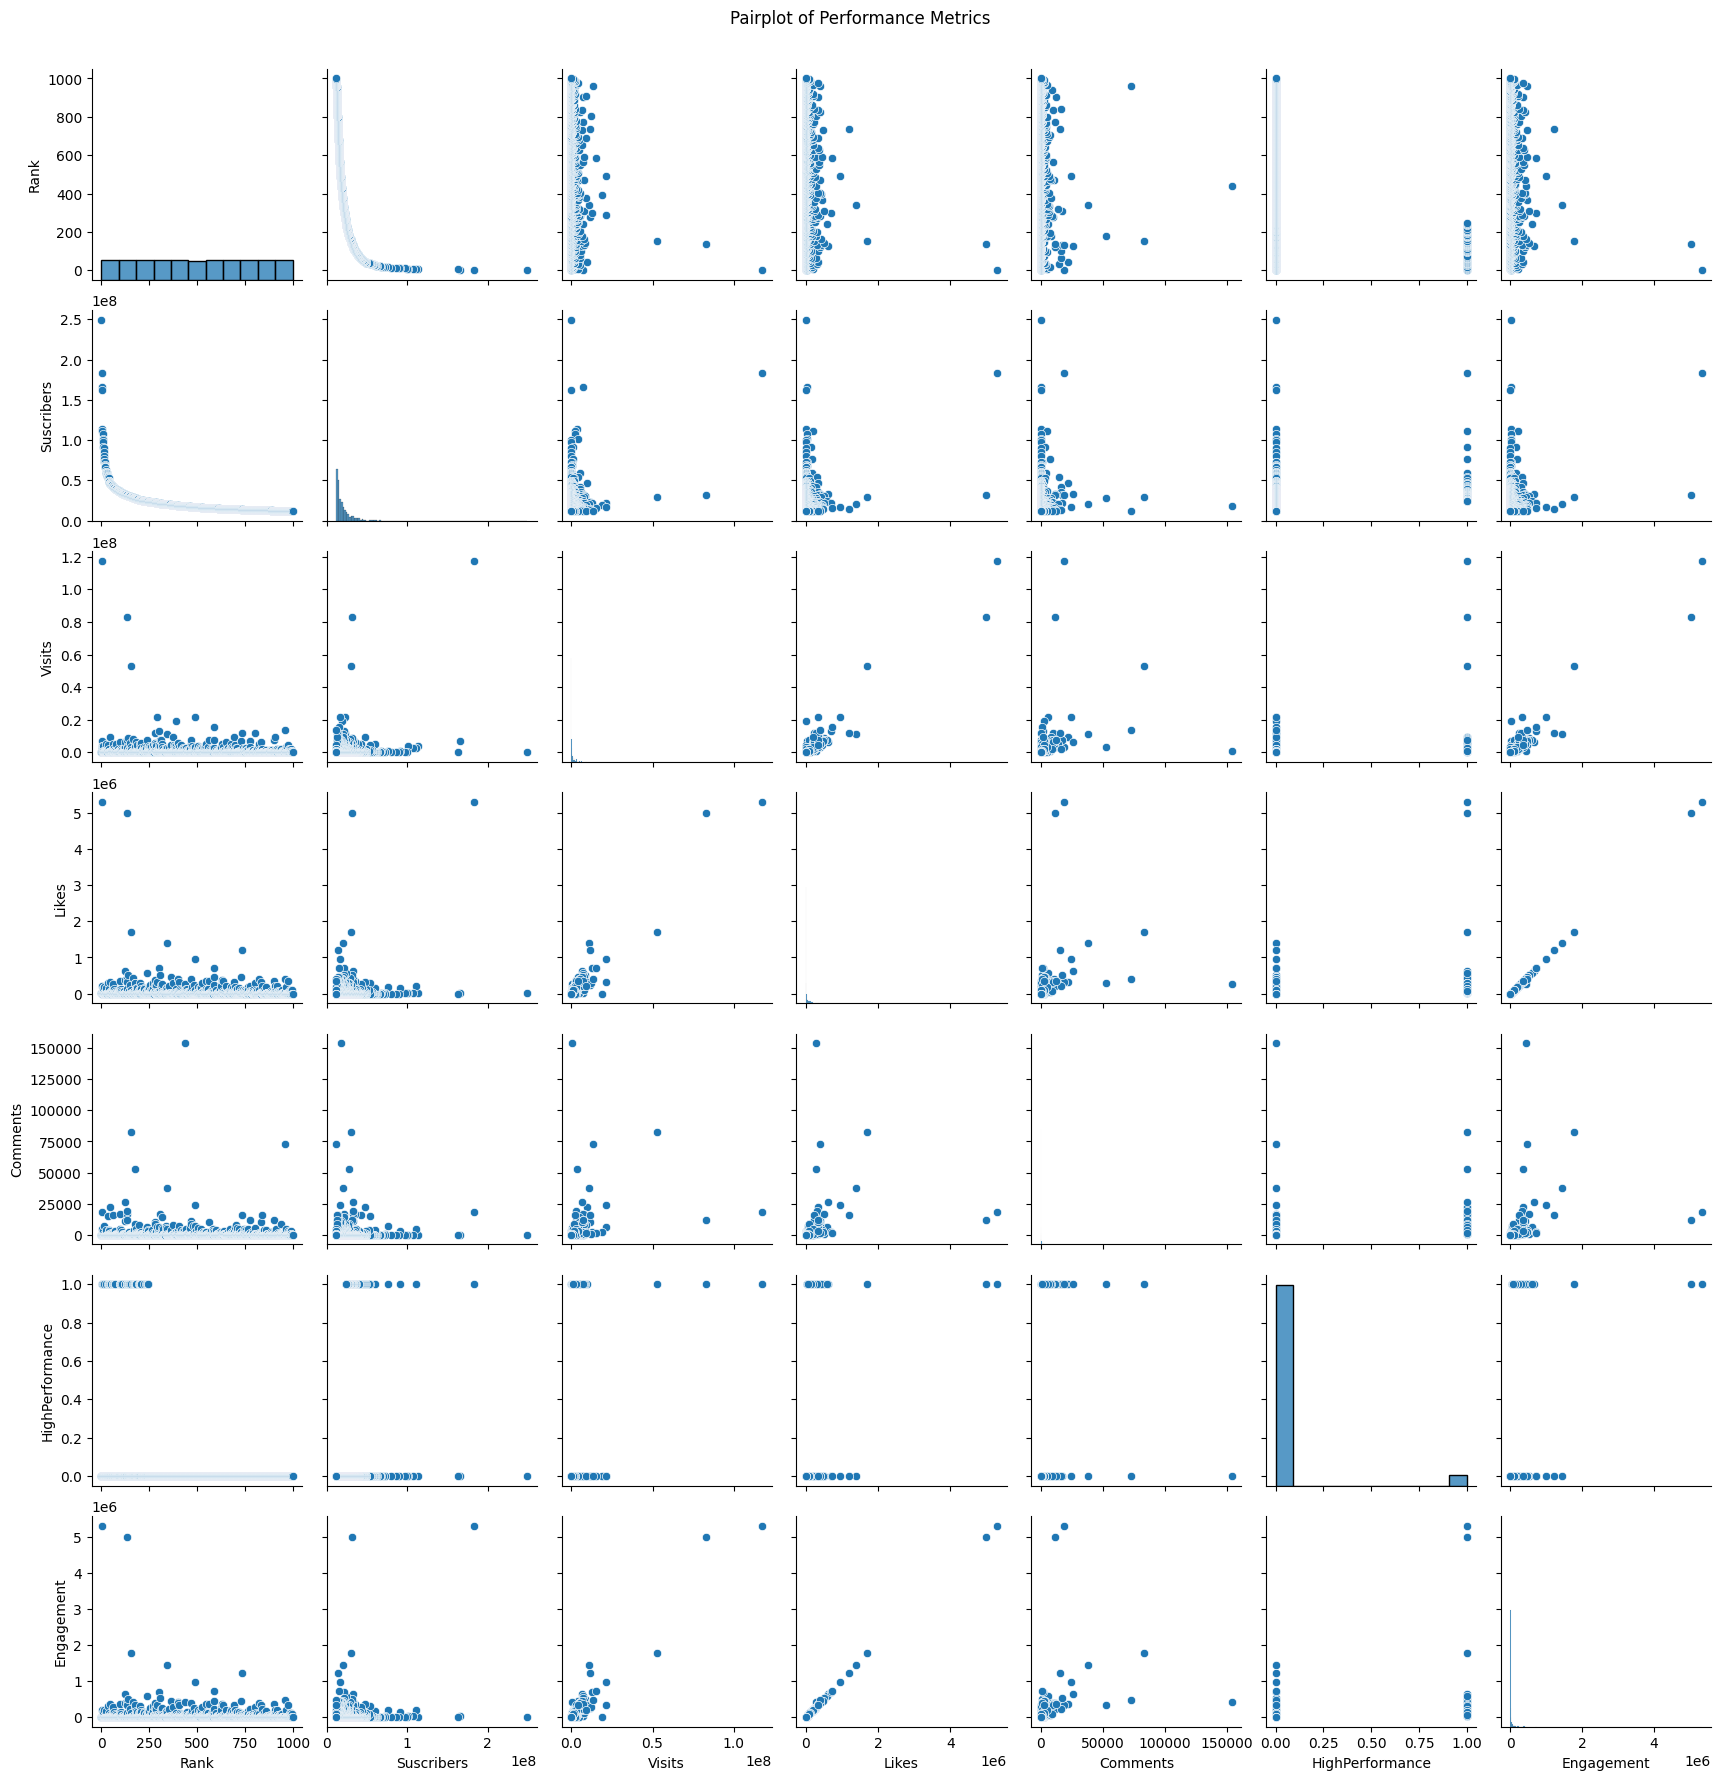

In [80]:
# Creating a pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

## Content Recommendations:
Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics.